##### Lab Assignment : Multiple Linear Regression and Support Vector Regression (SVR) with Dataset Medical Cost Personal Datasets

1. Identify the variables that will be used as independent variables (features) and the target variable (personal medical costs).
2. Split the dataset into training (train) and testing (test) data with an appropriate proportion.
3. Perform feature scaling if necessary.
4. Create a multiple linear regression model using Scikit-Learn.
5. Train the model on the training data and make predictions on the testing data.
6. Evaluate the model by calculating metrics such as R-squared, MSE, and MAE. Display the evaluation results.

##### Step 1: Import The Library and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
data = pd.read_csv('../data/insurance.csv')

##### Step 2: Understanding Data

In [2]:
# Viewing some initial data
data.head()

# Checking the data size
data.shape

# Information about the data
data.info()

# Data description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


After examining the data above, it can be seen that there is data with categorical variables. This causes the data to be unprocessable. Therefore, an encoding process is needed, which involves converting categorical variables into numerical variables.

##### Step 3: Encoding Process

In [4]:
# Encoding Categorical Data Process
le = LabelEncoder() 
data['sex'] = le.fit_transform(data['sex']) 
data['smoker'] = le.fit_transform(data['smoker']) 
data['region'] = le.fit_transform(data['region']) 

# Showing encoding result
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


After encoding, the variables that were previously categorical are transformed into numeric variables and can now be used for calculations.

##### Step 4: Visualizing data by identifying variables to be used as independent (feature) variables and the target variable (personal medical expenses)

Visualizing and determining independent and target variables is crucial to understand patterns, correlations, and the relevance of features in the data. It also aids in better data analysis. <br>
The independent variables (age, sex, bmi, children, smoker, and region) are the variables used as inputs to generate predictions/analysis. The target variable (charges) is the variable you want to predict.

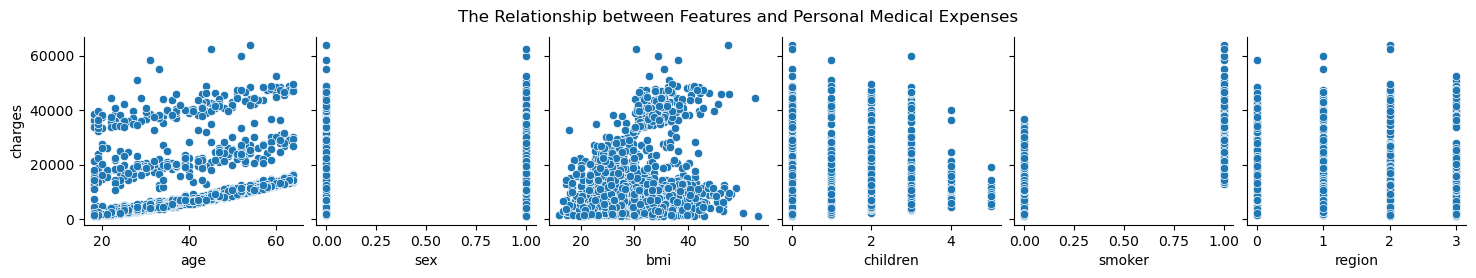

In [6]:
# Pairplot to see the relationship between independent variables and the target
sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'], y_vars=['charges'])
plt.suptitle('The Relationship between Features and Personal Medical Expenses', y=1.07)

# Showing plot
plt.show()

##### Step 5: Splitting the dataset into training and testing data with an 80:20 ratio

After completing step 4, we also need to split the dataset into training and testing data to evaluate and compare the performance of various models. The 80:20 ratio is used because it provides a good balance between training and testing data.

In [7]:
from sklearn.model_selection import train_test_split
# Separate the independent variables (features) and the target variable.
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# Split the dataset into training data (train) and test data (test) with a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Step 6: Train the Model on the Training Data

Training the model on the training data is necessary to allow the model to extract patterns from the data that can be used to make accurate predictions on unseen data, such as the test data. The code for training the model on the training data can be seen below.

In [8]:
from sklearn.linear_model import LinearRegression
# Creating a model object
model = LinearRegression()

# Training the model with the training data
model.fit(X_train, y_train)

LinearRegression()

The code above imports the linear regression model from the Scikit-Learn library and creates a model object. Then, using the training data (X_train and y_train), the model is trained to understand the relationship between the features (X_train) and the target variable (y_train).

##### Step 7: Making Predictions on Test Data

In [9]:
# To make predictions on the test data
y_pred = model.predict(X_test)

a. Scatter Plot


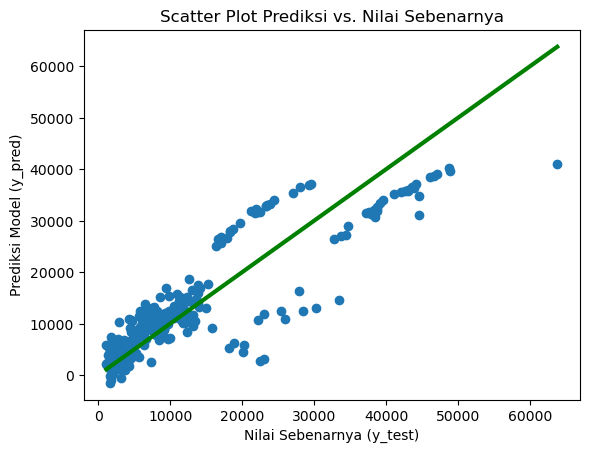

In [10]:
# Creating a scatter plot to compare predictions with actual values
plt.scatter(y_test, y_pred)
print('a. Scatter Plot')
plt.xlabel("Nilai Sebenarnya (y_test)")
plt.ylabel("Prediksi Model (y_pred)")
plt.title("Scatter Plot Prediksi vs. Nilai Sebenarnya")

# Adding a Regression Line (Diagonal Line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='-', linewidth=3)
plt.show()

Scatter plots are used to visualize data points and relationships between two variables. In the code above, I am predicting the test data using the previously trained model. Then, I create a scatter plot that compares the actual values (y_test) with the model's predictions (y_pred) to see how closely the model's predictions align with the actual values.

b. Histogram Residual


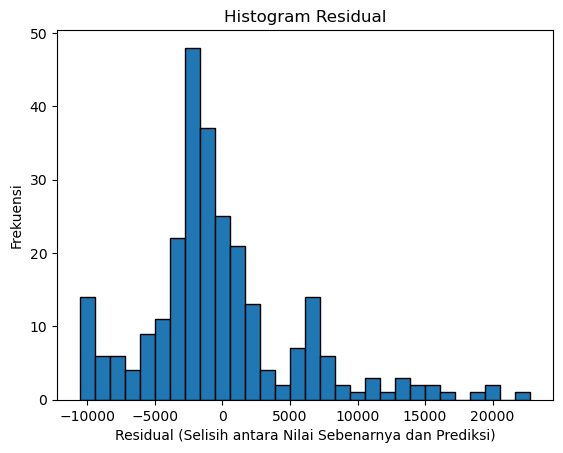

In [11]:
# Calculate residual
residuals = y_test - y_pred

# Making histogram residual
plt.hist(residuals, bins=30, edgecolor='k')
print('b. Histogram Residual')
plt.xlabel("Residual (Selisih antara Nilai Sebenarnya dan Prediksi)")
plt.ylabel("Frekuensi")
plt.title("Histogram Residual")
plt.show()


For the residual histogram, it's necessary to calculate the difference between the actual values and the model's predictions on the test data. In the code above, I calculated the residuals by subtracting the actual values (y_test) from the model's predictions (y_pred) and then displayed the histogram using plt.hist(). A symmetric histogram that approximates a distribution is a good indication of successful predictions on the test data.

##### Step 8: Feature Scaling

In [12]:
# Feature Scaling
y = y.values.reshape(-1,1) # Changing 1D data to 2D with 1 column

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

Using StandardScaler to scale the features (X) and the target (y). The code also transforms the target data into the appropriate format and standardizes the dataset's features, ensuring that the data is ready for model training and avoiding issues related to scale differences.

##### Step 9: Fitting SVR to Dataset

In [13]:
# Fitting SVR to Dataset
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X, y)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

The code above imports SVR (Support Vector Regression) from Scikit-Learn and creates an SVR model object with the appropriate kernel, which is 'rbf' (Radial Basis Function). Then, it trains the SVR model with the scaled data.

Since you have already performed feature scaling and fitted the SVR to the dataset, the next step is to visualize the results of the SVR model and create a plot that compares the actual values 'y' with the model's predictions 'y_pred'.

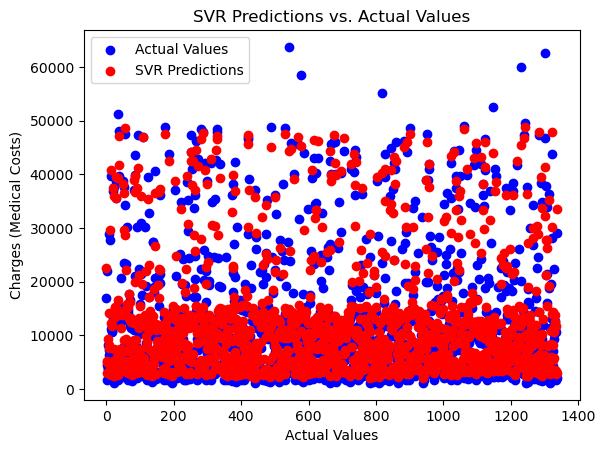

In [20]:
# Predicting on the training data
y_pred_scaled = svr.predict(X)

# Reshape the 1D array to 2D
y_pred_scaled_reshaped = y_pred_scaled.reshape(-1, 1)

# Inverse transform the reshaped scaled predictions
y_pred = sc_y.inverse_transform(y_pred_scaled_reshaped)

# Inverse transform the scaled actual values
y_actual = sc_y.inverse_transform(y)

# Plotting the prediction results vs. actual values
plt.scatter(range(len(y_actual)), y_actual, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='SVR Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Charges (Medical Costs)')
plt.legend()
plt.title('SVR Predictions vs. Actual Values')
plt.show()

##### Step 10: Evaluate SVR Model

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = svr.predict(X)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_actual, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_actual, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_actual, y_pred)

# Display R-squared, MAE, MSE, RMSE
print("R-squared:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R-squared: 0.8580074170742829
MAE: 0.20128586735349396
MSE: 0.14199258292571712
RMSE: 0.37681903206408923


The code above calculates several regression evaluation metrics such as R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the performance of the SVR model. The results are displayed to provide an understanding of how well the model fits the actual data in terms of accuracy and errors.